In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("../data/eustock.csv")
df

,DAX,SMI,CAC,FTSE
0,1628.75,1678.1,1772.8,2443.6
1,1613.63,1688.5,1750.5,2460.2
2,1606.51,1678.6,1718.0,2448.2
3,1621.04,1684.1,1708.1,2470.4
4,1618.16,1686.6,1723.1,2484.7
...,...,...,...,...
1855,5460.43,7721.3,3939.5,5587.6
1856,5285.78,7447.9,3846.0,5432.8
1857,5386.94,7607.5,3945.7,5462.2
1858,5355.03,7552.6,3951.7,5399.5


In [4]:
markets = list(df.columns)

In [6]:
import matplotlib.pyplot as plt

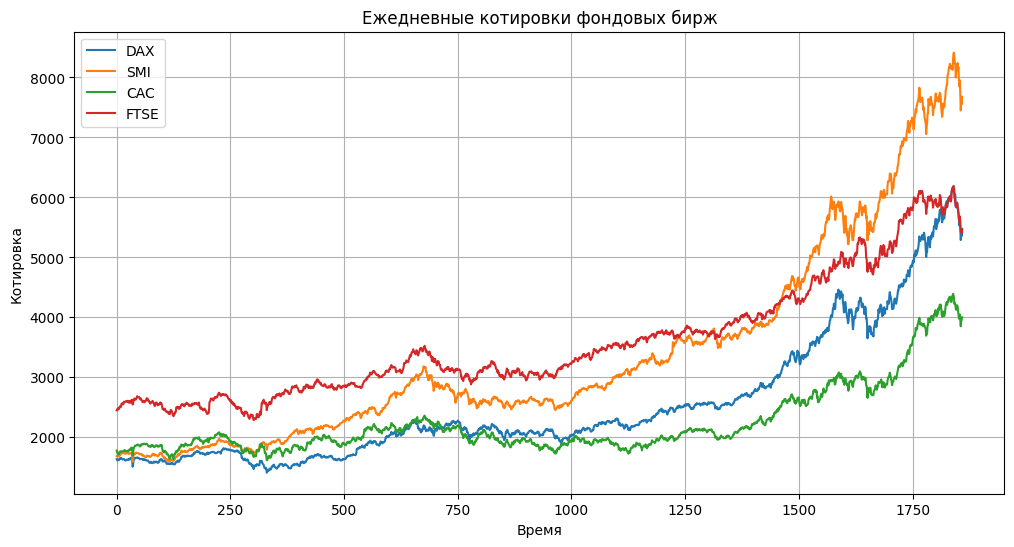

In [14]:
plt.figure(figsize=(12, 6))
for market in markets:
    plt.plot(df.index, df[market], label=market)
plt.title('Ежедневные котировки фондовых бирж')
plt.xlabel('Время')
plt.ylabel('Котировка')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
df = df.reset_index().rename(columns={"index": "time"})

In [15]:
from sklearn.linear_model import LinearRegression

In [17]:
results = {}

for market in markets:
    X = df[['time']].values
    y = df[market].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    results[market] = {
        'coef': model.coef_[0],
        'intercept': model.intercept_,
        'r2': model.score(X, y)
    }

In [19]:
import numpy as np

In [20]:
X_combined = []
y_combined = []
for market in markets:
    X_combined.append(df[['time']].values)
    y_combined.append(df[market].values)
X_combined = np.vstack(X_combined)
y_combined = np.concatenate(y_combined)

model_combined = LinearRegression()
model_combined.fit(X_combined, y_combined)

LinearRegression()

In [23]:
dynamics = {market: abs(results[market]['coef']) for market in markets}

for market in markets:
    print(f"{market}: {results[market]['coef']}")

DAX: 1.7294322637746682
SMI: 2.7597557940917032
CAC: 0.7868296563440051
FTSE: 1.6748314516108036
